# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.shape

(27028, 69)

In [4]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [5]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [6]:
sinasc_ro = sinasc_raw

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
# Criando uma coluna para categorizar as faixas de Latitude
sinasc_ro['Faixa_Latitude'] = pd.cut(sinasc_ro['munResLat'], 
                                     bins=[min(sinasc_ro['munResLat']), -10.5, max(sinasc_ro['munResLat'])],
                                     include_lowest=True, 
                                     labels=['Abaixo de -10.5', 'Acima de -10.5'])
sinasc_ro.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Faixa_Latitude
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5


In [8]:
sinasc_ro['Faixa_Latitude'].unique()

['Abaixo de -10.5', 'Acima de -10.5', NaN]
Categories (2, object): ['Abaixo de -10.5' < 'Acima de -10.5']

In [9]:
# Variáveis numéricas para calcular as estatísticas
variaveis = ['IDADEMAE', 'APGAR5']

# Groupby e cálculo das estatísticas
estatisticas = sinasc_ro.groupby('Faixa_Latitude')[variaveis].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Resultado
print(estatisticas)

                IDADEMAE                                                 \
                     sum       mean min max median       std        var   
Faixa_Latitude                                                            
Abaixo de -10.5   340143  26.178943  12  53   26.0  6.320385  39.947272   
Acima de -10.5    365094  26.014964  11  52   25.0  6.447663  41.572355   

                   APGAR5                                                  
                      sum      mean  min   max median       std       var  
Faixa_Latitude                                                             
Abaixo de -10.5  118393.0  9.138788  0.0  10.0    9.0  0.805381  0.648638  
Acima de -10.5   128746.0  9.216551  0.0  10.0    9.0  0.774741  0.600224  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
# Criando uma coluna para categorizar as faixas de Área dos Municípios
sinasc_ro['Faixa_Area'] = pd.cut(sinasc_ro['munResArea'], 
                          bins=[min(sinasc_ro['munResArea']), 3000, max(sinasc_ro['munResArea'])],
                          include_lowest=True,
                          labels=['Abaixo de 3000', 'Acima de 3000'])

sinasc_ro.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Faixa_Latitude,Faixa_Area
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000


In [11]:
# Variáveis numéricas para calcular as estatísticas
variaveis_numericas = ['QTDFILVIVO', 'QTDFILMORT']

# Groupby e cálculo das estatísticas
estatisticas = sinasc_ro.groupby('Faixa_Area')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Resultado
print(estatisticas)

               QTDFILVIVO                                                  \
                      sum      mean  min   max median       std       var   
Faixa_Area                                                                  
Abaixo de 3000     4773.0  0.924284  0.0  30.0    1.0  1.075442  1.156575   
Acima de 3000     22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
Faixa_Area                                                                 
Abaixo de 3000     1260.0  0.244803  0.0   4.0    0.0  0.551215  0.303838  
Acima de 3000      5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
# Analizando a distribuição da variável munResAlt no data frame
sinasc_ro['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [13]:
# Definindo faixas para a variável 'munResAlt' (altitude dos municípios)
faixas_altitude = [0, 100, 200, 300, 400, 500, 600]

# Criar uma nova coluna 'Faixa_Altitude' com base nas faixas definidas
sinasc_ro['Faixa_Altitude'] = pd.cut(sinasc_ro['munResAlt'], bins=faixas_altitude)
sinasc_ro.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Faixa_Latitude,Faixa_Area,Faixa_Altitude
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(300, 400]"
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(300, 400]"
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(300, 400]"
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000,"(300, 400]"
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(300, 400]"


In [14]:
sinasc_ro['Faixa_Altitude'].unique()

[(300.0, 400.0], (200.0, 300.0], (100.0, 200.0], (0.0, 100.0], (500.0, 600.0], (400.0, 500.0], NaN]
Categories (6, interval[int64, right]): [(0, 100] < (100, 200] < (200, 300] < (300, 400] < (400, 500] < (500, 600]]

In [15]:
# Escolha as variáveis numéricas para as quais você deseja calcular as estatísticas
variaveis_numericas = ['APGAR1', 'PESO']

# Realize o groupby e calcule as estatísticas
estatisticas = sinasc_ro.groupby('Faixa_Altitude')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Exiba o resultado
print(estatisticas)

                 APGAR1                                                  \
                    sum      mean  min   max median       std       var   
Faixa_Altitude                                                            
(0, 100]        72983.0  8.270028  0.0  10.0    8.0  0.938107  0.880046   
(100, 200]      95879.0  8.044215  0.0  10.0    8.0  1.015557  1.031356   
(200, 300]      29912.0  8.066882  0.0  10.0    8.0  1.039990  1.081579   
(300, 400]       5578.0  8.202941  2.0  10.0    8.0  0.844277  0.712804   
(400, 500]       1739.0  8.126168  0.0   9.0    8.0  0.876381  0.768044   
(500, 600]      13058.0  8.238486  0.0  10.0    8.0  0.838564  0.703190   

                    PESO                                              \
                     sum         mean  min   max  median         std   
Faixa_Altitude                                                         
(0, 100]        28831191  3245.659237  295  5135  3280.0  576.710709   
(100, 200]      38831302  3251.11369

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [16]:
# Dicionário de regiões para mapping:
# Arquivo dados_extras.csv disponível em: https://drive.google.com/file/d/1YJjpX40oJ_tL6NOodYFsAW-gU6It4ptk/view
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))
regioes_map

{"Alta Floresta D'Oeste": 'Cacoal',
 'Alto Alegre dos Parecis': 'Cacoal',
 'Alto Paraíso': 'Ariquemes',
 "Alvorada D'Oeste": 'Ji-Paraná',
 'Ariquemes': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cabixi': 'Vilhena',
 'Cacaulândia': 'Ariquemes',
 'Cacoal': 'Cacoal',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Candeias do Jamari': 'Porto Velho',
 'Castanheiras': 'Cacoal',
 'Cerejeiras': 'Vilhena',
 'Chupinguaia': 'Vilhena',
 'Colorado do Oeste': 'Vilhena',
 'Corumbiara': 'Vilhena',
 'Costa Marques': 'Ji-Paraná',
 'Cujubim': 'Ariquemes',
 "Espigão D'Oeste": 'Cacoal',
 'Governador Jorge Teixeira': 'Jaru',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Jaru': 'Jaru',
 'Ji-Paraná': 'Ji-Paraná',
 "Machadinho D'Oeste": 'Jaru',
 'Ministro Andreazza': 'Cacoal',
 'Mirante da Serra': 'Ji-Paraná',
 'Monte Negro': 'Ariquemes',
 "Nova Brasilândia D'Oeste": 'Cacoal',
 'Nova Mamoré': 'Porto Velho',
 'Nova União': 'Ji-Paraná',
 'Novo Horizonte do Oeste': 'Cacoal',
 'Ouro Preto do Oeste'

In [17]:
# Criando coluna RegiaoImediata
sinasc_ro['RegiaoImediata'] = sinasc_ro['munResNome'].map(regioes_map)
sinasc_ro.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Faixa_Latitude,Faixa_Area,Faixa_Altitude,RegiaoImediata
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(300, 400]",Cacoal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(300, 400]",Cacoal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(300, 400]",Cacoal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000,"(300, 400]",Cacoal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(300, 400]",Cacoal


In [18]:
sinasc_ro['RegiaoImediata'].unique()

array(['Cacoal', 'Ariquemes', 'Jaru', 'Porto Velho', 'Ji-Paraná',
       'Vilhena', nan], dtype=object)

In [19]:
# Verificando a coluna DTNASC
sinasc_ro['DTNASC'].isna().sum()

0

In [20]:
sinasc_ro['DTNASC'].dtype

dtype('O')

In [21]:
# Convertendo a coluna 'DTNASC' para o tipo data
sinasc_ro['DTNASC'] = pd.to_datetime(sinasc_ro['DTNASC']).copy() 

# Criando uma coluna MesNascimento para poder criar o gráfico ao longo do tempo
sinasc_ro['MesNascimento'] = sinasc_ro['DTNASC'].dt.month

sinasc_ro['MesNascimento'].unique()

array([ 2,  3,  4,  5,  6,  1,  7,  8,  9, 10, 11, 12])

In [22]:
# Agrupando os dados por região imediata e ano, calculando a idade média das mulheres
grupo_regiao_imediata = sinasc_ro.groupby(['RegiaoImediata', 'MesNascimento'])['IDADEMAE'].mean().reset_index()
grupo_regiao_imediata

,RegiaoImediata,MesNascimento,IDADEMAE
0,Ariquemes,1,24.866412
1,Ariquemes,2,25.316239
2,Ariquemes,3,25.288660
3,Ariquemes,4,25.411972
4,Ariquemes,5,25.410256
...,...,...,...
67,Vilhena,8,26.297436
68,Vilhena,9,26.407407
69,Vilhena,10,26.161435
70,Vilhena,11,26.169725


In [23]:
import matplotlib.pyplot as plt

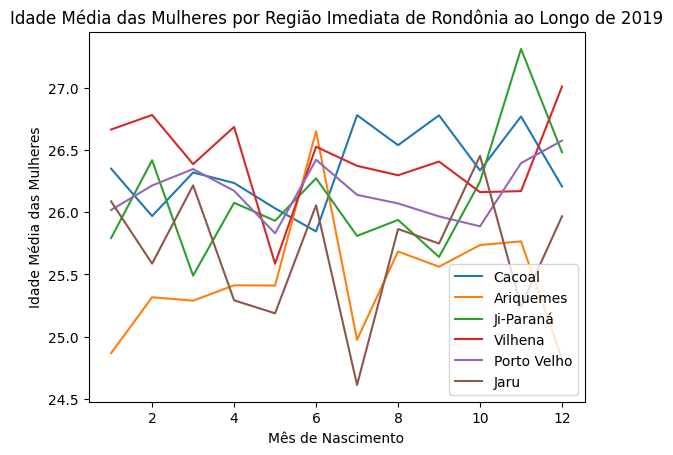

In [24]:
# Criando um gráfico de linha para cada região imediata

regioes_imediatas = ['Cacoal', 'Ariquemes', 'Ji-Paraná', 'Vilhena', 'Porto Velho', 'Jaru']

for regiao in regioes_imediatas:
    dados_regiao = grupo_regiao_imediata[grupo_regiao_imediata['RegiaoImediata'] == regiao]
    plt.plot(dados_regiao['MesNascimento'], dados_regiao['IDADEMAE'], label=regiao)

# Opções do gráfico
plt.xlabel('Mês de Nascimento')
plt.ylabel('Idade Média das Mulheres')
plt.title('Idade Média das Mulheres por Região Imediata de Rondônia ao Longo de 2019')
plt.legend()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [25]:
# Faixas de IDH
# IDH muito alto (0,800 – 1,000)
# IDH alto (0,700 – 0,799)
# IDH médio (0,600 0,699)
# IDH baixo (0,500 – 0,599) 
# IDH muito baixo (0,000 – 0,499)

faixas_idh = [0, 0.5, 0.6, 0.7, 0.8, 1.0]

# Categorizando os municípios com base nas faixas de IDH
dados_ro['Faixa_IDH'] = pd.cut(dados_ro['idh'], bins=faixas_idh, labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto'])
dados_ro.head()

,municipio,regiao,idh,ifdm,pib,Faixa_IDH
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,Médio
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,Baixo
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,Médio
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,Médio
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,Alto


In [26]:
# Média do IDH por faixa de IDH
dados_ro.groupby(['Faixa_IDH'])['idh'].mean().reset_index()

,Faixa_IDH,idh
0,Muito Baixo,NaN
1,Baixo,0.591333
2,Médio,0.644784
3,Alto,0.718500
4,Muito Alto,NaN


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [27]:
# Alto, resultados superiores a 0,8 pontos
# Moderado, resultados entre 0,6 e 0,8 pontos
# Regular, resultados entre 0,4 e 0,6 pontos
# Baixo, resultados inferiores a 0,4 pontos

# Faixas IFDM
faixas_ifdm = [0, 0.4, 0.6, 0.8, 1.0]

# Categorizando os municípios com base nas faixas de IFDM
dados_ro['Faixa_IFDM'] = pd.cut(dados_ro['ifdm'], bins=faixas_ifdm, labels=['Baixo', 'Regular', 'Moderado', 'Alto'])
dados_ro.head()


,municipio,regiao,idh,ifdm,pib,Faixa_IDH,Faixa_IFDM
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,Médio,Moderado
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,Baixo,Regular
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,Médio,Regular
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,Médio,Regular
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,Alto,Moderado


In [28]:
# Média do IFDM por faixa de IFDM
dados_ro.groupby(['Faixa_IFDM'])['ifdm'].mean().reset_index()

,Faixa_IFDM,ifdm
0,Baixo,NaN
1,Regular,0.556362
2,Moderado,0.659919
3,Alto,NaN


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [29]:
# Até 100 milhões
# De 100 milhões até 200 milhões
# De 200 milhões até 300 milhões
# De 300 milhões até 500 milhões
# De 500 milhões até 1 bilhão
# Acima de 1 bilhão

# Faixas PIB, a coluna está em milhões, pois é assim que está do data set
faixas_pib = [0, 100000, 200000, 300000, 500000, 1000000, float('inf')]
faixas_pib

[0, 100000, 200000, 300000, 500000, 1000000, inf]

In [30]:
# Categorizando os municípios com base nas faixas do PIB
categorias_pib = ['Até 100 milhões', 'Até 200 milhões', 'Até 300 milhões', 'Até 500 milhões', 
                  'Até 1 bilhão', 'Acima de 1 bilhão']
dados_ro['Faixa_PIB'] = pd.cut(dados_ro['pib'], 
                               bins=faixas_pib, 
                               labels=categorias_pib)
dados_ro['Faixa_PIB'].unique()

['Até 500 milhões', 'Até 300 milhões', 'Acima de 1 bilhão', 'Até 1 bilhão', 'Até 200 milhões', 'Até 100 milhões']
Categories (6, object): ['Até 100 milhões' < 'Até 200 milhões' < 'Até 300 milhões' < 'Até 500 milhões' < 'Até 1 bilhão' < 'Acima de 1 bilhão']

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [31]:
# Unindo os data frames
dados_completos = sinasc_ro.merge(dados_ro, left_on='munResNome', right_on='municipio', how='left')
dados_completos.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,RegiaoImediata,MesNascimento,municipio,regiao,idh,ifdm,pib,Faixa_IDH,Faixa_IFDM,Faixa_PIB
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,Cacoal,2,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000.0,Médio,Moderado,Até 500 milhões
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,Cacoal,2,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000.0,Médio,Moderado,Até 500 milhões
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,Cacoal,2,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000.0,Médio,Moderado,Até 500 milhões
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,Cacoal,3,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410.0,Baixo,Regular,Até 300 milhões
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,Cacoal,3,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000.0,Médio,Moderado,Até 500 milhões


In [32]:
# Distribuição de nascimentos por faixa de IDH
dados_completos[['municipio','Faixa_IDH']].groupby('Faixa_IDH').count()

,municipio
Faixa_IDH,
Muito Baixo,0
Baixo,1826
Médio,9273
Alto,15928
Muito Alto,0


A maioria dos nascimentos se deu municípios com IDH Alto

In [33]:
# Média de filhos vivos por região
dados_completos[['regiao', 'QTDFILVIVO']].groupby(['regiao']).mean('QTDFILVIVO')

,QTDFILVIVO
regiao,
Ariquemes,1.064743
Cacoal,0.945028
Jaru,0.965642
Ji-Paraná,0.943553
Porto Velho,1.217308
Vilhena,0.931883


A região de Porto Velho possui a maior média de filhos vivos

In [34]:
# Média do APGAR5 por região
dados_completos[['regiao', 'APGAR5']].groupby('regiao').mean('APGAR5')

,APGAR5
regiao,
Ariquemes,9.314047
Cacoal,9.103718
Jaru,9.014899
Ji-Paraná,9.159935
Porto Velho,9.226379
Vilhena,9.100410


Não existe uma diferença significativa do APGAR5 entre as regiões.

In [35]:
# Média de idade das mães por faixa de PIB
dados_completos[['Faixa_PIB', 'IDADEMAE']].groupby(['Faixa_PIB']).mean('IDADEMAE')

,IDADEMAE
Faixa_PIB,
Até 100 milhões,26.515081
Até 200 milhões,25.662910
Até 300 milhões,25.323204
Até 500 milhões,25.833511
Até 1 bilhão,25.782528
Acima de 1 bilhão,26.265562


In [36]:
# Nascimentos por faixa de PIB
dados_completos[['Faixa_PIB']].groupby(['Faixa_PIB']).size()

Faixa_PIB
Até 100 milhões        431
Até 200 milhões       1952
Até 300 milhões        724
Até 500 milhões       1880
Até 1 bilhão          4304
Acima de 1 bilhão    17736
dtype: int64

In [37]:
# Média de idade das mães por faixa de PIB
dados_completos[['Faixa_PIB', 'IDADEMAE']].groupby(['Faixa_PIB']).mean('IDADEMAE')

,IDADEMAE
Faixa_PIB,
Até 100 milhões,26.515081
Até 200 milhões,25.662910
Até 300 milhões,25.323204
Até 500 milhões,25.833511
Até 1 bilhão,25.782528
Acima de 1 bilhão,26.265562


As maiores médias de idades das mães se concentra nas faixas extremas do PIB. 
Já para a quantidade de nascimentos, temos uma menor quantidade na faixa até 100 milhões e uma maior quantidade na faixa acima de 1 bilhão.

In [38]:
# Média de idade das mães e quantidade de filhos vivos por região
dados_completos[['regiao', 'IDADEMAE', 'QTDFILVIVO']].groupby(['regiao']).mean('IDADEMAE', 'QTDFILVIVO')

,IDADEMAE,QTDFILVIVO
regiao,,
Ariquemes,25.459635,1.064743
Cacoal,26.347817,0.945028
Jaru,25.708853,0.965642
Ji-Paraná,26.094720,0.943553
Porto Velho,26.166303,1.217308
Vilhena,26.417143,0.931883


A região de Vilhena possui a maior média de idade das mães, porém com a menor média de filhos vivos

In [39]:
# Quantidade de nascimentos por região
dados_completos[['regiao']].groupby(['regiao']).size()

regiao
Ariquemes       3233
Cacoal          4603
Jaru            1683
Ji-Paraná       4962
Porto Velho    10096
Vilhena         2450
dtype: int64

In [40]:
# Desvio padrão da idade das mães por Faixa de IDH
dados_completos[['Faixa_IDH', 'IDADEMAE']].groupby(['Faixa_IDH']).std()

,IDADEMAE
Faixa_IDH,
Muito Baixo,NaN
Baixo,6.194908
Médio,6.361998
Alto,6.415538
Muito Alto,NaN


Não se percebe uma variação significativa no desvio padrão das idades das mães por faixa de IDH